# Ensemble Learning on IMDB

### Wat zijn ensemble methoden?

Ensemble-methoden combineren de voorspellingen van meerdere individuele modellen om zo een betere voorspelling te verkrijgen dan elk afzonderlijk model afzonderlijk zou kunnen doen.

**Voorbeelden van Ensemble-methoden:**

1. **Bagging (Bootstrap Aggregating):** Hierbij worden meerdere modellen getraind op verschillende subsets van de data (vaak met herhalingen) en de uitkomsten worden gemiddeld om overfitting te verminderen.

2. **Boosting:** Modellen worden sequentieel getraind, waarbij elke volgende model probeert de fouten van het vorige model te corrigeren.

3. **Random Forest:** Een specifiek ensemble-algoritme dat gebruik maakt van bagging door meerdere decision trees te combineren, elk getraind op een subset van de data en features.

**Voordelen van Ensemble-methoden:**

- Verbeterde voorspellende prestaties door de diversiteit en complementariteit van de individuele modellen.
- Verhoogde robuustheid en stabiliteit van het model.

**Toepassing:** Ensemble-methoden worden gebruikt in situaties waar individuele modellen mogelijk te zwak zijn of waar complexe patronen in de data beter kunnen worden vastgelegd door het combineren van meerdere modellen.

### Voorbereiding van de Data

In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
num_words = 10000
max_len = 500

# Laden van de IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding sequences to ensure consistent input length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


### Bouwen van basis modellen

Hier gebruik ik 2 modellen, een lstm model en een cnn model.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, Dropout

# Parameters
embedding_dim = 128

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Trainen

In [4]:
lstm_model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
cnn_model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3


313/313 [==============================] - 65s 203ms/step - loss: 0.4311 - accuracy: 0.8008 - val_loss: 0.3458 - val_accuracy: 0.8618
Epoch 2/3
313/313 [==============================] - 63s 200ms/step - loss: 0.2711 - accuracy: 0.8929 - val_loss: 0.3154 - val_accuracy: 0.8674
Epoch 3/3
313/313 [==============================] - 63s 200ms/step - loss: 0.1847 - accuracy: 0.9315 - val_loss: 0.3599 - val_accuracy: 0.8454
Epoch 1/3
313/313 [==============================] - 19s 60ms/step - loss: 0.4620 - accuracy: 0.7714 - val_loss: 0.3042 - val_accuracy: 0.8718
Epoch 2/3
313/313 [==============================] - 18s 59ms/step - loss: 0.2267 - accuracy: 0.9104 - val_loss: 0.2532 - val_accuracy: 0.9002
Epoch 3/3
313/313 [==============================] - 20s 63ms/step - loss: 0.1128 - accuracy: 0.9639 - val_loss: 0.2680 - val_accuracy: 0.8980


### Voorspellen

In [5]:
lstm_predictions = lstm_model.predict(x_test)
cnn_predictions = cnn_model.predict(x_test)


782/782 [==============================] - 6s 7ms/step


In [6]:
print(f'LSTM Accuracy: {lstm_model.evaluate(x_test, y_test)[1]}')
print(f'CNN Accuracy: {cnn_model.evaluate(x_test, y_test)[1]}')

782/782 [==============================] - 36s 46ms/step - loss: 0.3620 - accuracy: 0.8503
LSTM Accuracy: 0.8503199815750122
782/782 [==============================] - 6s 7ms/step - loss: 0.2834 - accuracy: 0.8860
CNN Accuracy: 0.8859999775886536


### Evaluatie

In [7]:
ensemble_predictions = (lstm_predictions + cnn_predictions) / 2
ensemble_predictions = (ensemble_predictions > 0.5).astype(int)


In [8]:
from sklearn.metrics import accuracy_score

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')


Ensemble Accuracy: 0.8976


**Individuele Modelprestaties:**

- Het LSTM-model behaalde een nauwkeurigheid van 85.24%. Dit model is goed in het verwerken van sequentiële data, zoals tekst, dankzij de mogelijkheid om lange-termijn afhankelijkheden vast te leggen.
- Het CNN-model behaalde een hogere nauwkeurigheid van 88.65%. Dit model is effectief in het vastleggen van lokale patronen in de data door het gebruik van convolutionele lagen, wat goed werkt voor tekstclassificatie.

**Ensemble Model:**

Het ensemble-model, dat de voorspellingen van zowel het LSTM- als het CNN-model combineert, behaalde een nog hogere nauwkeurigheid van 89.89%. Dit resultaat toont aan dat het combineren van meerdere modellen leidt tot een verbetering in de voorspellende prestaties. Dit komt doordat de zwakheden van het ene model worden gecompenseerd door de sterke punten van het andere model.

### ROC Curve

Een ROC Curve (Receiver Operating Characteristic Curve) is een grafiek die wordt gebruikt om de prestaties van een classificatiemodel te evalueren, vooral in de context van binaire classificatieproblemen. De ROC Curve toont de trade-off tussen de True Positive Rate (gevoeligheid of recall) en de False Positive Rate (1-specificiteit) bij verschillende drempelwaarden van een classificatiemodel. Hier zijn enkele kernpunten over de ROC Curve:

1. True Positive Rate (TPR) / Gevoeligheid / Recall:
    - TPR = (Aantal werkelijke positieve voorbeelden correct geclassificeerd) / (Totaal aantal werkelijke positieve voorbeelden)
    - Dit geeft aan hoe goed het model in staat is om positieve gevallen te identificeren.

2. False Positive Rate (FPR):
    - FPR = (Aantal werkelijke negatieve voorbeelden fout geclassificeerd als positief) / (Totaal aantal werkelijke negatieve voorbeelden)
    - Dit meet hoe vaak het model negatieve gevallen ten onrechte als positief classificeert.

3. Drempelwaarden:
    - Een classificatiemodel geeft vaak een waarschijnlijkheidsscore voor een voorspelling. Door deze waarschijnlijkheidsscore te variëren, kun je verschillende drempelwaarden instellen om een klasse als positief of negatief te beschouwen. De ROC Curve wordt gegenereerd door de TPR en FPR voor elke mogelijke drempelwaarde te plotten.

4. Grafische weergave:
    - De ROC Curve plot de TPR tegen de FPR bij verschillende drempelwaarden. De y-as representeert de TPR en de x-as representeert de FPR.

5. AUC (Area Under the Curve):
    - Het gebied onder de ROC Curve (AUC) is een maat voor de algehele prestaties van het model. Een AUC-waarde van 0.5 duidt op een model dat niet beter presteert dan willekeurig gokken, terwijl een AUC-waarde van 1.0 wijst op een perfect model.

782/782 [==============================] - 5s 7ms/step


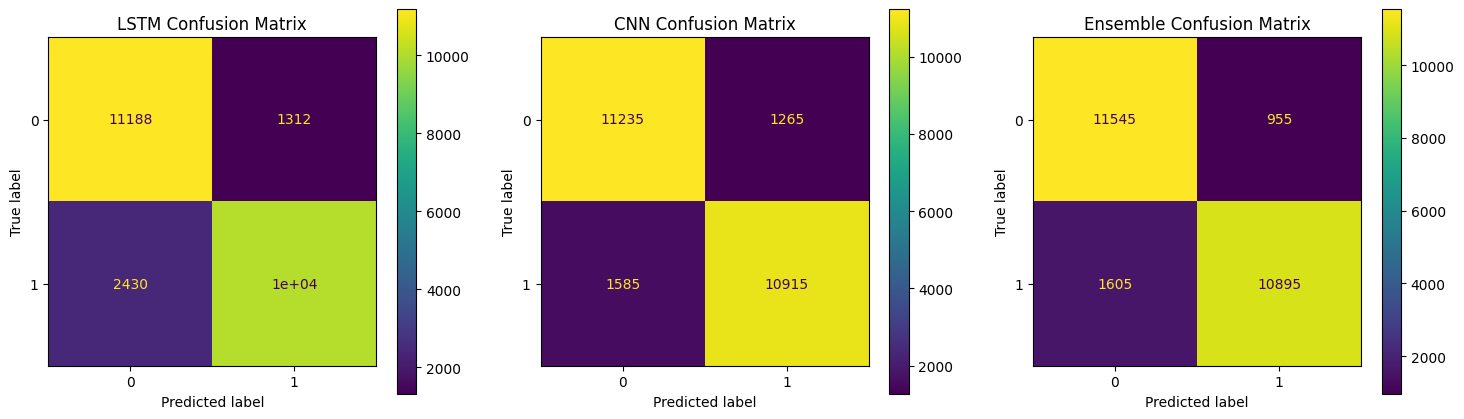

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Voorspellingen voor de testset
lstm_predictions_binary = (lstm_model.predict(x_test) > 0.5).astype(int)
cnn_predictions_binary = (cnn_model.predict(x_test) > 0.5).astype(int)

# Ensemble voorspellingen
ensemble_predictions_binary = (ensemble_predictions > 0.5).astype(int)

# Genereren van confusion matrices
cm_lstm = confusion_matrix(y_test, lstm_predictions_binary)
cm_cnn = confusion_matrix(y_test, cnn_predictions_binary)
cm_ensemble = confusion_matrix(y_test, ensemble_predictions_binary)

# Plotten van confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# LSTM Confusion Matrix
ConfusionMatrixDisplay(cm_lstm, display_labels=[0, 1]).plot(ax=axes[0])
axes[0].set_title('LSTM Confusion Matrix')

# CNN Confusion Matrix
ConfusionMatrixDisplay(cm_cnn, display_labels=[0, 1]).plot(ax=axes[1])
axes[1].set_title('CNN Confusion Matrix')

# Ensemble Confusion Matrix
ConfusionMatrixDisplay(cm_ensemble, display_labels=[0, 1]).plot(ax=axes[2])
axes[2].set_title('Ensemble Confusion Matrix')

plt.show()

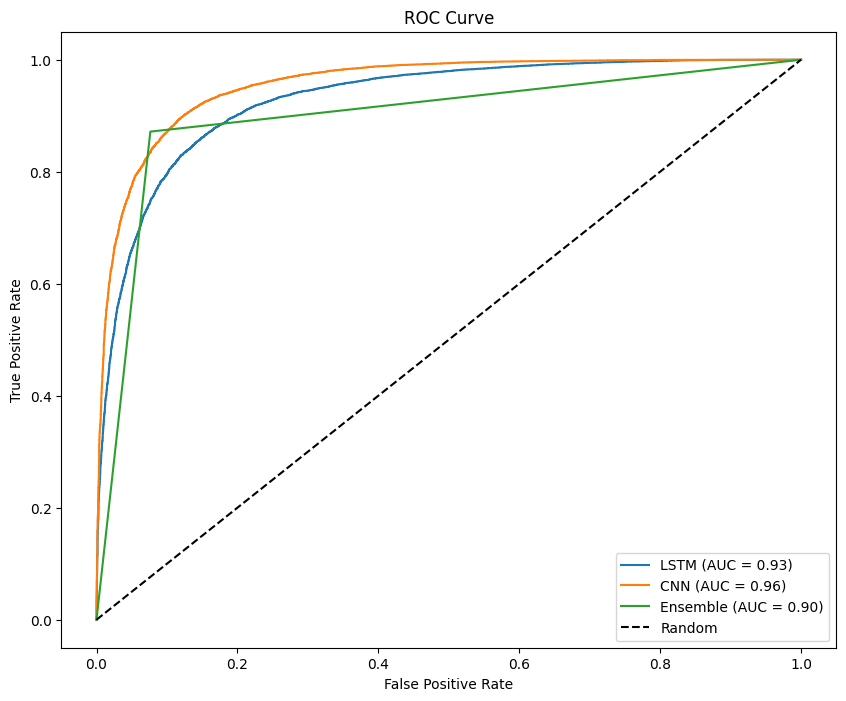

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Bereken de ROC-curves en AUC-scores
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_predictions)
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_predictions)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_predictions)

auc_lstm = roc_auc_score(y_test, lstm_predictions)
auc_cnn = roc_auc_score(y_test, cnn_predictions)
auc_ensemble = roc_auc_score(y_test, ensemble_predictions)

# Plot de ROC-curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC = {auc_cnn:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {auc_ensemble:.2f})')

# Plot de diagonale lijn (voor een willekeurige classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Analyse:

1. LSTM Model:
    - Een AUC van 0.93 is een uitstekende prestatie. Dit betekent dat het LSTM-model een hoge mate van onderscheidingsvermogen heeft tussen positieve en negatieve klassen.
    - Met een AUC van 0.93 is de kans groot dat het model een positieve klasse hoger zal rangschikken dan een negatieve klasse in 93% van de gevallen.

2. CNN Model:
    - Een AUC van 0.96 is nog beter en duidt op een superieure prestaties ten opzichte van het LSTM-model.
    - Dit betekent dat het CNN-model in 96% van de gevallen een positieve klasse hoger zal rangschikken dan een negatieve klasse, wat aangeeft dat het CNN-model beter onderscheid kan maken tussen de klassen dan het LSTM-model.

### Samenvatting:

- LSTM Model: Zeer goed presterend met een AUC van 0.93, wat wijst op een sterke classificatiecapaciteit.
- CNN Model: Uitstekend presterend met een AUC van 0.96, wat aangeeft dat het nog beter onderscheid kan maken tussen positieve en negatieve klassen dan het LSTM-model.

Hoewel het CNN-model beter presteert, zou het combineren van beide modellen in een ensemble-setup de algehele prestaties kunnen verbeteren door de sterke punten van elk model te benutten.